# Analysis

In [1]:
import os
import bokeh
from bokeh.plotting import show
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

import flowkit as fk
import seaborn as sns
import matplotlib.pyplot as plt

bokeh.io.output_notebook()

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loading BokehJS ...

In [2]:
#load in patient dataset
data = pd.read_csv("patient_data.csv")
data

,Subject Accession,H1,H3,B,FCS Raw,FCS Preprocessed,WSP File
0,SUB120420,64,16,16,Panel_L1_A1_L1_110194_PBMC_10112011_A01.580227...,export_Panel_L1_A1_L1_110194_PBMC_10112011_A01...,Panel_L1_Run_2.804556.wsp
1,SUB120423,256,16,16,Panel_L1_A2_L1_110197_PBMC_10112011_A02.579447...,export_Panel_L1_A2_L1_110197_PBMC_10112011_A02...,Panel_L1_Run_1.804538.wsp
2,SUB120445,64,8,32,Panel_L1_A3_L1_110243_PBMC_10172011_A03.578999...,export_Panel_L1_A3_L1_110243_PBMC_10172011_A03...,Panel_L1_Run_4.804574.wsp
3,SUB120446,1024,256,64,Panel_L1_A1_L1_110244_PBMC_10172011_A01.579604...,export_Panel_L1_A1_L1_110244_PBMC_10172011_A01...,Panel_L1_Run_5.804583.wsp
4,SUB120449,1024,128,64,Panel_L1_E3_L1_110247_PBMC_10172011_E03.580335...,export_Panel_L1_E3_L1_110247_PBMC_10172011_E03...,Panel_L1_Run_4.804574.wsp
5,SUB120450,64,32,16,Panel_L1_E1_L1_110248_PBMC_10172011_E01.578572...,export_Panel_L1_E1_L1_110248_PBMC_10172011_E01...,Panel_L1_Run_5.804583.wsp
6,SUB120452,128,128,128,Panel_L1_A2_L1_110250_PBMC_10172011_A02.579307...,export_Panel_L1_A2_L1_110250_PBMC_10172011_A02...,Panel_L1_Run_5.804583.wsp
7,SUB120457,128,128,32,Panel_L1_E2_L1_110255_PBMC_10172011_E02.580138...,export_Panel_L1_E2_L1_110255_PBMC_10172011_E02...,Panel_L1_Run_5.804583.wsp
8,SUB120458,256,64,32,Panel_L1_A3_L1_110256_PBMC_10172011_A03.579670...,export_Panel_L1_A3_L1_110256_PBMC_10172011_A03...,Panel_L1_Run_5.804583.wsp
9,SUB120459,128,32,64,Panel_L1_A1_L1_110257_PBMC_10172011_A01.580299...,export_Panel_L1_A1_L1_110257_PBMC_10172011_A01...,Panel_L1_Run_6.804592.wsp


In [3]:
#Sample Extraction Function
def extractFCSDF(fileName, source = "Raw"):
    path = ""
    if source == "Preprocessed":
        path = os.path.join("FCS/Preprocessed", fileName)
    else:
        path = os.path.join("FCS/Raw", fileName)
    sample = fk.Sample(path)
    return sample.as_dataframe(source = "raw")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_values = []
Y_values = []

for index, row in data.iterrows():
    fileName = row['FCS Raw']
    sample_df = extractFCSDF(fileName, source="Raw")
    
    subject_features = sample_df.mean(axis=0)
    X_values.append(subject_features.values)
    
    Y_values.append([row["H1"], row["H3"], row["B"]])

X = np.array(X_values)
y = np.array(Y_values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = MultiOutputClassifier(
    LogisticRegression(max_iter=2000, random_state=10)
)
classifier.fit(X_train_scaled, y_train)

for i, target_name in enumerate(['H1', 'H3', 'B']):
    accuracy = classifier.estimators_[i].score(X_test_scaled, y_test[:, i])
    print(f"Accuracy for {target_name}: {accuracy:.3f}")

# Calculate F1 score 
for i, target_name in enumerate(['H1', 'H3', 'B']):
    print(classifier.estimators_[i].predict(X_test_scaled))
    print(y_test[:, i])
    f1 = f1_score(y_test[:, i], classifier.estimators_[i].predict(X_test_scaled), average='weighted')
    print(f"F1 score for {target_name}: {f1:.3f}")




Accuracy for H1: 0.000
Accuracy for H3: 0.000
Accuracy for B: 0.500
[1024   64  256  256]
[128 256  64 128]
F1 score for H1: 0.000
[256   8  64  64]
[128  64  32 128]
F1 score for H3: 0.000
[32 64 32 32]
[ 32  64  16 128]
F1 score for B: 0.375


In [4]:
class CellTransformer(nn.Module):
    def __init__(self, input_dim, embed_dim, num_heads, num_layers, dropout=0.1):
        super(CellTransformer, self).__init__()
        # Embed each cell's features into a higher-dimensional space.
        self.embedding = nn.Linear(input_dim, embed_dim)
        
        # Define a stack of transformer encoder layers.
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        
        # After aggregating the transformer output, use a linear layer to map to the HAI titer.
        self.output_linear = nn.Linear(embed_dim, 1)  # Output a single value (regression)
        
    def forward(self, x):
        # x: (batch_size, seq_len, input_dim) where seq_len is the number of cells per sample.
        # Embed the input features.
        x = self.embedding(x)  # Now x has shape: (batch_size, seq_len, embed_dim)
        
        # Transformer modules expect input shape (seq_len, batch_size, embed_dim)
        x = x.transpose(0, 1)
        
        # Process the sequence with the transformer encoder.
        x = self.transformer_encoder(x)
        
        # Transpose back to (batch_size, seq_len, embed_dim)
        x = x.transpose(0, 1)
        
        # Aggregate the encoded features across the sequence (cells). Here we use the mean.
        x = x.mean(dim=1)  # Resulting shape: (batch_size, embed_dim)
        
        # Map the aggregated features to a predicted HAI titer.
        out = self.output_linear(x)  # Final shape: (batch_size, 1)
        return out

# Each cell is described by 7 features: [CD4, CCR7, CD3, CD45RA, HLADR, scatter, viability]
input_dim = 7    # Number of features per cell.
embed_dim = 64   # Embedding dimension for the transformer.
num_heads = 4    # Number of attention heads.
num_layers = 3   # Number of transformer encoder layers.

model = CellTransformer(input_dim, embed_dim, num_heads, num_layers)
print(model)


CellTransformer(
  (embedding): Linear(in_features=7, out_features=64, bias=True)
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-2): 3 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (output_linear): Linear(in_features=64, out_features=1, bias=True)
)


/opt/anaconda3/lib/python3.9/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
# Set device to GPU if available, otherwise CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model = model.to(device)

results = []

selected_features = [
    ('PerCP-Cy5-5-A', 'CD4'),   # CD4
    ('PE-A', 'CCR7'),           # CCR7
    ('V450-A', 'CD3'),          # CD3
    ('PE-Cy7-A', 'CD45RA'),     # CD45RA
    ('V500-A', 'HLA-DR'),       # HLA-DR
    ('FSC-A', ''),              # FSC-A
    ('SSC-A', '')               # SSC-A
]

for index, row in data.iterrows():

  sample_df = extractFCSDF(row['FCS Raw'], source="Raw")
  
  features = sample_df[selected_features].values
  
  # Convert to tensor and add batch dimension
  features_tensor = torch.FloatTensor(features)
  features_tensor = features_tensor.unsqueeze(0)  # Add batch dimension
  features_tensor = features_tensor.to(device)

  print(f"Processing sample {index + 1}/{len(data)}")
  
  with torch.no_grad():
    output = model(features_tensor)
    
  results.append({
    'Subject': row['Subject Accession'],
    'Predicted_Value': output.item(),
    'H1': row['H1'],
    'H3': row['H3'],
    'B': row['B']
  })
  torch.cuda.empty_cache()

results_df = pd.DataFrame(results)
print(results_df)

# so obviously idk if this is right or not to compare?
plt.figure(figsize=(10, 6))
plt.scatter(results_df['H1'], results_df['Predicted_Value'])
plt.xlabel('Actual H1 Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

Using device: cpu
Processing sample 1/20


: 

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FeedForward(nn.Module):
    """
    Position-wise feed-forward layer used inside the Transformer blocks.
    """
    def __init__(self, d_model, dim_feedforward=128, dropout=0.1):
        super().__init__()
        self.linear1 = nn.Linear(d_model, dim_feedforward)
        self.dropout = nn.Dropout(dropout)
        self.linear2 = nn.Linear(dim_feedforward, d_model)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.dropout(x)
        x = self.linear2(x)
        return x


class AttnBlock(nn.Module):
    """
    One 'attention + skip connection + layer norm + feed-forward' sub-block.
    - X is the 'query' set if called as AttnBlock(X, Y).
    - Y is used as 'key'/'value'.
    """
    def __init__(self, d_model, n_heads=4, dropout=0.1):
        super().__init__()
        self.d_model = d_model
        self.n_heads = n_heads
        self.mha = nn.MultiheadAttention(d_model, n_heads, dropout=dropout, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.ln1 = nn.LayerNorm(d_model)
        self.ff = FeedForward(d_model, dim_feedforward=4*d_model, dropout=dropout)
        self.ln2 = nn.LayerNorm(d_model)

    def forward(self, x, y):
        # Multi-head attention with skip connection
        # Query = x, Key = y, Value = y
        x_norm = self.ln1(x)
        y_norm = self.ln1(y)  # optional separate LN; can also do ln on x only
        attn_out, _ = self.mha(x_norm, y_norm, y_norm)  # (batch_size, seq_len, d_model)
        x2 = x + self.dropout(attn_out)

        # Feed-forward block with skip connection
        x2_norm = self.ln2(x2)
        ff_out = self.ff(x2_norm)
        out = x2 + self.dropout(ff_out)
        return out


class IndAttnBlock(nn.Module):
    """
    Induced Self-Attention Block:
      1) I' = AttnBlock(I, X)
      2) X' = AttnBlock(X, I')
    where I is a small set of learnable parameters (k, d).
    """
    def __init__(self, k, d_model, n_heads=4, dropout=0.1):
        super().__init__()
        # The block uses two standard 'AttnBlock's:
        self.attn_I = AttnBlock(d_model, n_heads, dropout)
        self.attn_X = AttnBlock(d_model, n_heads, dropout)
        # k is how many 'inducing' vectors we keep
        self.k = k
        self.d_model = d_model

    def forward(self, X, I):
        """
        X: (batch_size, N, d_model)  -> the set of N cell-embedding vectors
        I: (k, d_model)              -> learnable parameters for the block (shared across batches)
        """
        bsize = X.size(0)
        # Expand I to batch dimension: shape = (batch_size, k, d_model)
        I_expanded = I.unsqueeze(0).expand(bsize, self.k, self.d_model)

        # Step 1: I' = AttnBlock(I, X)
        I_prime = self.attn_I(I_expanded, X)

        # Step 2: X' = AttnBlock(X, I')
        X_prime = self.attn_X(X, I_prime)
        return X_prime


class InducedTransformer(nn.Module):
    """
    An example 'Set Transformer'-style model that:
      - Takes in FCM data of shape (batch_size, N, input_dim).
      - Applies three IndAttnBlocks with k=16, d=32, n_heads=4 (as in the paper).
      - Produces per-cell logits of shape (batch_size, N, 1) for binary classification.
    """
    def __init__(self,
                 input_dim=10,      # Number of markers in the base panel
                 k=16,             # Number of inducing points
                 d_model=32,       # Embedding dimension
                 n_heads=4,
                 n_blocks=3,
                 dropout=0.1):
        super().__init__()

        # (Optional) Initial linear projection from input_dim -> d_model
        # The paper says "we do not apply a separate embedding step," but
        # you can keep this if your raw input markers need scaling.
        self.input_proj = nn.Linear(input_dim, d_model)

        # Learnable inducing parameters, shape (k, d_model)
        self.inducing_points = nn.Parameter(torch.randn(k, d_model))

        # Stack of IndAttnBlocks
        self.blocks = nn.ModuleList([
            IndAttnBlock(k, d_model, n_heads, dropout) for _ in range(n_blocks)
        ])

        # Final linear for per-cell classification: (d_model -> 1)
        self.classifier = nn.Linear(d_model, 1)

    def forward(self, x):
        """
        x: (batch_size, N, input_dim)
        returns logits: (batch_size, N, 1)
        """
        # Optional projection to d_model dimension
        x = self.input_proj(x)

        # Apply multiple IndAttnBlocks
        for block in self.blocks:
            x = block(x, self.inducing_points)

        # Row-wise linear for each cell's embedding -> binary classification logit
        logits = self.classifier(x)  # shape = (batch_size, N, 1)
        return logits



In [6]:
# print out the columns for the dataframe for the first subject's raw data

# Get the first subject's FCS file
first_sample = extractFCSDF(data['FCS Raw'].iloc[0], source="Raw")
print("Columns in the FCS file:")
for col in first_sample.columns:
    print(col)

Columns in the FCS file:
('FSC-A', '')
('FSC-H', '')
('FSC-W', '')
('SSC-A', '')
('SSC-H', '')
('SSC-W', '')
('V450-A', 'CD3')
('V500-A', 'HLA-DR')
('APC-A', 'CD38')
('Alexa Fluor 700-A', 'CD28')
('APC-Cy7-A', 'CD8')
('PE-A', 'CCR7')
('Live Dead Fixable Red-A', 'Viability')
('PE-Cy7-A', 'CD45RA')
('FITC-A', 'CD27')
('PerCP-Cy5-5-A', 'CD4')
('Time', '')


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np

# -----------------------------
# Dummy Dataset for FCM Samples
# -----------------------------
class DummyFCMDataset(Dataset):
    """
    Each sample is a matrix of shape (num_cells, input_dim)
    and each corresponding label is a binary label per cell of shape (num_cells, 1).
    """
    def __init__(self, num_samples=50, num_cells=1000, input_dim=10):
        self.num_samples = num_samples
        self.num_cells = num_cells
        self.input_dim = input_dim
        
        # Create dummy feature data
        self.data = np.random.randn(num_samples, num_cells, input_dim).astype(np.float32)
        # Create dummy binary labels (0 or 1) for each cell
        self.labels = np.random.randint(0, 2, size=(num_samples, num_cells, 1)).astype(np.float32)
        
    def __len__(self):
        return self.num_samples
    
    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx])
        y = torch.tensor(self.labels[idx])
        return x, y

# Create the dataset and dataloader.
dataset = DummyFCMDataset(num_samples=50, num_cells=1000, input_dim=10)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# -----------------------------
# Model Setup
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate your InducedTransformer model.
# Here input_dim should match the number of features per cell in your dataset.
model = InducedTransformer(input_dim=10, k=16, d_model=32, n_heads=4, n_blocks=3, dropout=0.1)
model = model.to(device)

# -----------------------------
# Loss and Optimizer
# -----------------------------
# We use BCEWithLogitsLoss since the model outputs raw logits for binary classification.
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# -----------------------------
# Training Loop
# -----------------------------
num_epochs = 5

model.train()  # Set model to training mode.
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch_features, batch_labels in dataloader:
        # Move batch data to the proper device.
        # batch_features: (batch_size, num_cells, input_dim)
        # batch_labels: (batch_size, num_cells, 1)
        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device)
        
        # Zero the gradients.
        optimizer.zero_grad()
        
        # Forward pass.
        outputs = model(batch_features)  # Expected shape: (batch_size, num_cells, 1)
        
        # Compute loss.
        loss = criterion(outputs, batch_labels)
        
        # Backpropagation.
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        
    avg_loss = epoch_loss / len(dataloader)
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f}")


Epoch 1/5 - Loss: 0.7045
Epoch 2/5 - Loss: 0.6953
Epoch 3/5 - Loss: 0.6941
Epoch 4/5 - Loss: 0.6936
Epoch 5/5 - Loss: 0.6940


Using device: cpu
Processing subject 1/20
Processing subject 2/20
Processing subject 3/20
Processing subject 4/20
Processing subject 5/20
Processing subject 6/20
Processing subject 7/20
Processing subject 8/20
Processing subject 9/20
Processing subject 10/20
Processing subject 11/20
Processing subject 12/20
Processing subject 13/20
Processing subject 14/20
Processing subject 15/20
Processing subject 16/20
Processing subject 17/20
Processing subject 18/20
Processing subject 19/20
Processing subject 20/20

Prediction Results:
      Subject   H1_pred   H3_pred    B_pred  H1_actual  H3_actual  B_actual
0   SUB120420  0.999536  0.000315  0.092585         64         16        16
1   SUB120423  0.998065  0.000805  0.058804        256         16        16
2   SUB120445  0.998544  0.023026  0.051732         64          8        32
3   SUB120446  0.998778  0.001968  0.031826       1024        256        64
4   SUB120449  0.998133  0.000563  0.058265       1024        128        64
5   SUB120450 

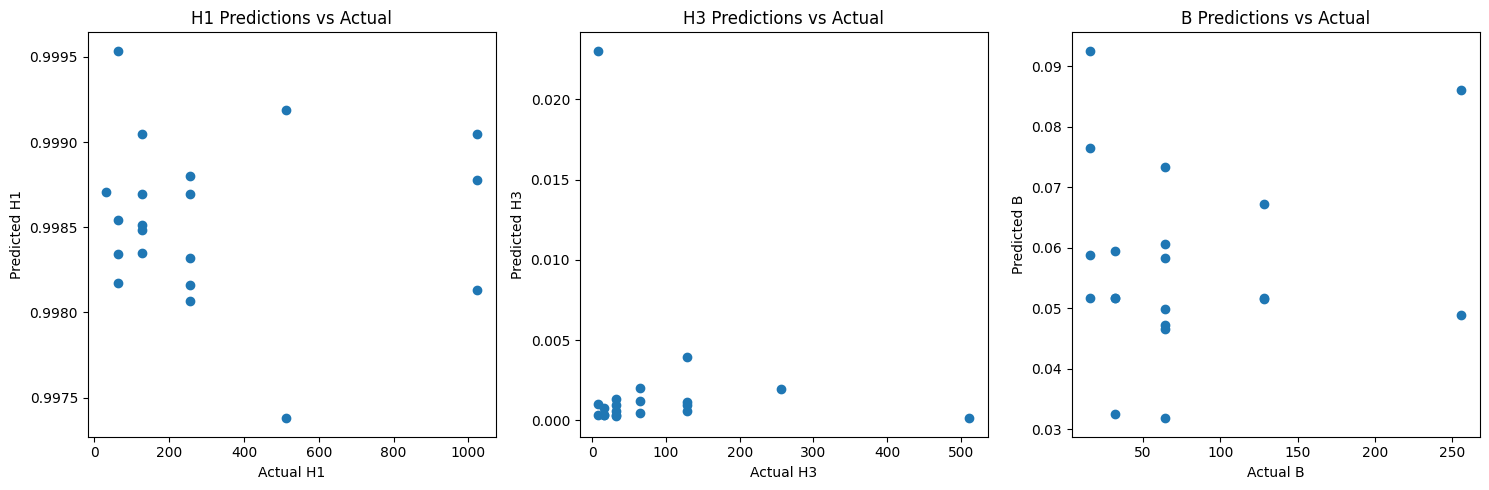

In [7]:
# Initialize three separate models for H1, H3, and B predictions
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
selected_features = [
    ('PerCP-Cy5-5-A', 'CD4'),   # CD4
    ('PE-A', 'CCR7'),           # CCR7
    ('V450-A', 'CD3'),          # CD3
    ('PE-Cy7-A', 'CD45RA'),     # CD45RA
    ('V500-A', 'HLA-DR'),       # HLA-DR
    ('FSC-A', ''),              # FSC-A
    ('SSC-A', '')               # SSC-A
]
input_dim = len(selected_features)  # Using the same features as before
models = {
  'H1': InducedTransformer(input_dim=input_dim, k=16, d_model=32, n_heads=4, n_blocks=3).to(device),
  'H3': InducedTransformer(input_dim=input_dim, k=16, d_model=32, n_heads=4, n_blocks=3).to(device),
  'B': InducedTransformer(input_dim=input_dim, k=16, d_model=32, n_heads=4, n_blocks=3).to(device)
}

predictions = {
  'Subject': [],
  'H1_pred': [],
  'H3_pred': [],
  'B_pred': [],
  'H1_actual': [],
  'H3_actual': [],
  'B_actual': []
}

with torch.no_grad():
  for index, row in data.iterrows():
    print(f"Processing subject {index + 1}/{len(data)}")
    
    # Get the FCS data
    sample_df = extractFCSDF(row['FCS Raw'], source="Raw")
    features = sample_df[[col[0] for col in selected_features]].values
    
    # Convert to tensor and add batch dimension
    features_tensor = torch.FloatTensor(features).unsqueeze(0).to(device)
    
    # Get predictions from each model
    subject_predictions = {}
    for target in ['H1', 'H3', 'B']:
      outputs = models[target](features_tensor)
      # Average the cell-level predictions to get a subject-level prediction
      pred = torch.sigmoid(outputs).mean().item()
      subject_predictions[f'{target}_pred'] = pred
    
    # Store predictions and actual values
    predictions['Subject'].append(row['Subject Accession'])
    predictions['H1_pred'].append(subject_predictions['H1_pred'])
    predictions['H3_pred'].append(subject_predictions['H3_pred'])
    predictions['B_pred'].append(subject_predictions['B_pred'])
    predictions['H1_actual'].append(row['H1'])
    predictions['H3_actual'].append(row['H3'])
    predictions['B_actual'].append(row['B'])

# Convert to DataFrame and display results
results_df = pd.DataFrame(predictions)
print("\nPrediction Results:")
print(results_df)

# Plot predictions vs actual values for each target
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
targets = ['H1', 'H3', 'B']

for i, target in enumerate(targets):
  axes[i].scatter(results_df[f'{target}_actual'], results_df[f'{target}_pred'])
  axes[i].set_xlabel(f'Actual {target}')
  axes[i].set_ylabel(f'Predicted {target}')
  axes[i].set_title(f'{target} Predictions vs Actual')

plt.tight_layout()
plt.show()